In [1]:
import importlib
from sympy import *
from sympy.plotting import plot3d
from tensorflow.keras.datasets import mnist # библиотека с базой Mnist                         +
from tensorflow.keras.models import Sequential # подключение класса создания модели Sequential +
from tensorflow.keras.layers import Dense,Activation,Dropout,BatchNormalization # основные слои +
# можно будет add.Activation()
from tensorflow.keras.optimizers import Adam # подключение оптимизатора Адам
from tensorflow.keras import utils # утилиты для to_categorical                                +
from tensorflow.keras.preprocessing import image # для отрисовки изображений
import numpy as np #                                                                           +
import pylab # модуль для построения графиков
import matplotlib.pyplot as plt #                                                              +
from google.colab import files # для загрузки своей картинки
import mpl_toolkits
from PIL import Image # отрисовка изображений
# для отрисовки изображений в ноутбуке, а не в консоль (или файл)
%matplotlib inline

In [2]:
import matplotlib.image as mpimg
import os
from tensorflow.keras.preprocessing import image
import pandas as pd
import io

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# **Полная выборка** (full)

In [4]:
xTrain = np.load('/content/drive/MyDrive/staj_2/s/xTrain_sag_8qqrq.npy')
xVal = np.load('/content/drive/MyDrive/staj_2/s/xVal_sag_8qqrq.npy')
yTrain = np.load('/content/drive/MyDrive/staj_2/s/yTrain_sag_8qqrq.npy')
yVal = np.load("/content/drive/MyDrive/staj_2/s/yVal_sag_8qqrq.npy")

In [5]:
print(xTrain.shape)
print(xVal.shape)
print(yTrain.shape)
print(yVal.shape)

(1629, 24576)
(182, 24576)
(1629,)
(182,)


In [6]:
yVal[0]

8.0

нормализовать

In [7]:
xTrain = xTrain.astype('float')
xTrain = xTrain/255 # диапазон значений -> от 0 до 1
xVal = xVal.astype('float')
xVal = xVal/255 # диапазон значений -> от 0 до 1

In [8]:
xTrain # взглянуть

array([[1.        , 0.98431373, 0.99215686, ..., 0.03921569, 0.01960784,
        0.        ],
       [0.9254902 , 0.04313725, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.00784314, 0.00784314,
        0.00784314],
       ...,
       [0.        , 0.02352941, 0.03529412, ..., 0.01176471, 0.01960784,
        0.02352941],
       [0.        , 0.        , 0.        , ..., 0.99215686, 0.98431373,
        0.98039216],
       [0.99607843, 1.        , 1.        , ..., 0.00392157, 0.00392157,
        0.00392157]])

In [9]:
xTrain.shape

(1629, 24576)

In [10]:
# преобразовать y_train и y_test сетей в формат one hot encoding
yTraiN = utils.to_categorical(yTrain,9) #
yVal = utils.to_categorical(yVal,9)

In [11]:
yVal[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [12]:
listic =  ["0_normal", "1_sujenie", "2_raschirenie", "3_distal", "4_mesial",
          '5_sujenie,_distal', "6_sujenie,_mesial", "7_raschirenie,_distal", "8_raschirenie,_mesial"]

In [13]:
# Вывод объектов в ячейке colab
from IPython.display import display


In [ ]:
# Функция компиляции и обучения модели нейронной сети

In [14]:
# Функция компиляции и обучения модели нейронной сети
def compile_train_model(model,
                        x_train,
                        y_train,
                        x_val,
                        y_val,
                        optimizer='adam',
                        epochs=200,
                        batch_size=128,
                        figsize=(20, 5)):

    # Компиляция модели
    model.compile(optimizer=optimizer,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    # Вывод сводки
    model.summary()

    # Вывод схемы модели
    display(plot_model(model, dpi=60, show_shapes=True))

    # Обучение модели с заданными параметрами
    history = model.fit(x_train,
                        y_train,
                        epochs=epochs,
                        batch_size=batch_size,
                        validation_data=(x_val, y_val))

    # Вывод графиков точности и ошибки
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=figsize)
    fig.suptitle('График процесса обучения модели')
    ax1.plot(history.history['accuracy'],
               label='Доля верных ответов на обучающем наборе')
    ax1.plot(history.history['val_accuracy'],
               label='Доля верных ответов на проверочном наборе')
    ax1.xaxis.get_major_locator().set_params(integer=True)
    ax1.set_xlabel('Эпоха обучения')
    ax1.set_ylabel('Доля верных ответов')
    ax1.legend()

    ax2.plot(history.history['loss'],
               label='Ошибка на обучающем наборе')
    ax2.plot(history.history['val_loss'],
               label='Ошибка на проверочном наборе')
    ax2.xaxis.get_major_locator().set_params(integer=True)
    ax2.set_xlabel('Эпоха обучения')
    ax2.set_ylabel('Ошибка')
    ax2.legend()
    plt.show()

In [ ]:
# Функция вывода результатов оценки модели на заданных данных

In [15]:
# Функция вывода результатов оценки модели на заданных данных
def eval_model(model, x, y_true,
               class_labels=[],
               cm_round=3,
               title='',
               figsize=(5, 5)):
    # Вычисление предсказания сети
    y_pred = model.predict(x)
    # Построение матрицы ошибок
    cm = confusion_matrix(np.argmax(y_true, axis=1),
                          np.argmax(y_pred, axis=1),
                          normalize='true')
    # Округление значений матрицы ошибок
    cm = np.around(cm, cm_round)

    # Отрисовка матрицы ошибок
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(f'Нейросеть {title}: матрица ошибок нормализованная', fontsize=18)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
    disp.plot(ax=ax)
    plt.gca().images[-1].colorbar.remove()  # Стирание ненужной цветовой шкалы
    plt.xlabel('Предсказанные классы', fontsize=16)
    plt.ylabel('Верные классы', fontsize=16)
    fig.autofmt_xdate(rotation=45)          # Наклон меток горизонтальной оси при необходимости
    plt.show()

    print('-'*100)
    print(f'Нейросеть: {title}')

    # Для каждого класса:
    for cls in range(len(class_labels)):
        # Определяется индекс класса с максимальным значением предсказания (уверенности)
        cls_pred = np.argmax(cm[cls])
        # Формируется сообщение о верности или неверности предсказания
        msg = 'ВЕРНО :-)' if cls_pred == cls else 'НЕВЕРНО :-('
        # Выводится текстовая информация о предсказанном классе и значении уверенности
        print('Класс: {:<20} {:3.0f}% сеть отнесла к классу {:<20} - {}'.format(class_labels[cls],
                                                                               100. * cm[cls, cls_pred],
                                                                               class_labels[cls_pred],
                                                                               msg))

    # Средняя точность распознавания определяется как среднее диагональных элементов матрицы ошибок
    print('\nСредняя точность распознавания: {:3.0f}%'.format(100. * cm.diagonal().mean()))

In [ ]:
# Совместная функция обучения и оценки модели нейронной сети

In [16]:
# Совместная функция обучения и оценки модели нейронной сети
def compile_train_eval_model(model,
                             x_train,
                             y_train,
                             x_test,
                             y_test,
                             class_labels=listic,
                             title='',
                             optimizer='adam',
                             epochs=10,
                             batch_size=50,
                             graph_size=(20, 5),
                             cm_size=(10, 10)):

    # Компиляция и обучение модели на заданных параметрах
    # В качестве проверочных используются тестовые данные
    compile_train_model(model,
                        x_train, y_train,
                        x_test, y_test,
                        optimizer=Adam(learning_rate=0.0000005),
                        epochs=epochs,
                        batch_size=batch_size,
                        figsize=graph_size)

    # Вывод результатов оценки работы модели на тестовых данных
    eval_model(model, x_test, y_test,
               class_labels=listic,
               title=title,
               figsize=cm_size)

In [17]:
# Рисование схемы модели
from tensorflow.keras.utils import plot_model
# Матрица ошибок классификатора
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [18]:
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input

Model: "sagittal_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sag (InputLayer)            [(None, 24576)]           0         
                                                                 
 dense (Dense)               (None, 5000)              122885000 
                                                                 
 dense_1 (Dense)             (None, 1000)              5001000   
                                                                 
 dropout (Dropout)           (None, 1000)              0         
                                                                 
 dense_2 (Dense)             (None, 5000)              5005000   
                                                                 
 dense_3 (Dense)             (None, 1000)              5001000   
                                                                 
 batch_normalization (Batch  (None, 1000)           

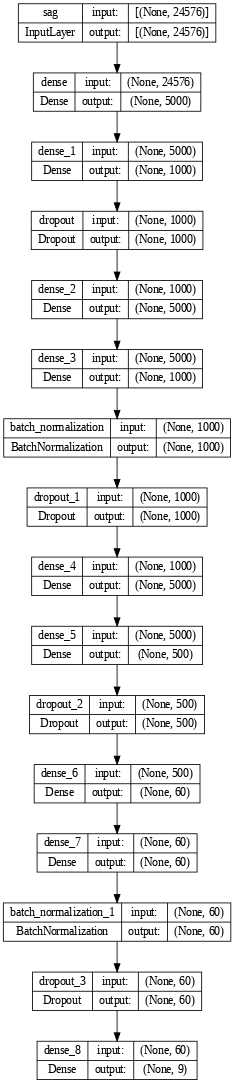

Epoch 1/100
34/34 [==============================] - 10s 54ms/step - loss: 2.5682 - accuracy: 0.1688 - val_loss: 2.1686 - val_accuracy: 0.1868
Epoch 2/100
34/34 [==============================] - 2s 45ms/step - loss: 2.0524 - accuracy: 0.2928 - val_loss: 1.9872 - val_accuracy: 0.2747
Epoch 3/100
34/34 [==============================] - 1s 44ms/step - loss: 1.7241 - accuracy: 0.3880 - val_loss: 1.8208 - val_accuracy: 0.3626
Epoch 4/100
34/34 [==============================] - 2s 45ms/step - loss: 1.5173 - accuracy: 0.4684 - val_loss: 1.6865 - val_accuracy: 0.4176
Epoch 5/100
34/34 [==============================] - 2s 44ms/step - loss: 1.3555 - accuracy: 0.5347 - val_loss: 1.5474 - val_accuracy: 0.4560
Epoch 6/100
34/34 [==============================] - 2s 45ms/step - loss: 1.2186 - accuracy: 0.5973 - val_loss: 1.4194 - val_accuracy: 0.5110
Epoch 7/100
34/34 [==============================] - 2s 46ms/step - loss: 1.1146 - accuracy: 0.6366 - val_loss: 1.3036 - val_accuracy: 0.5879
Epoch

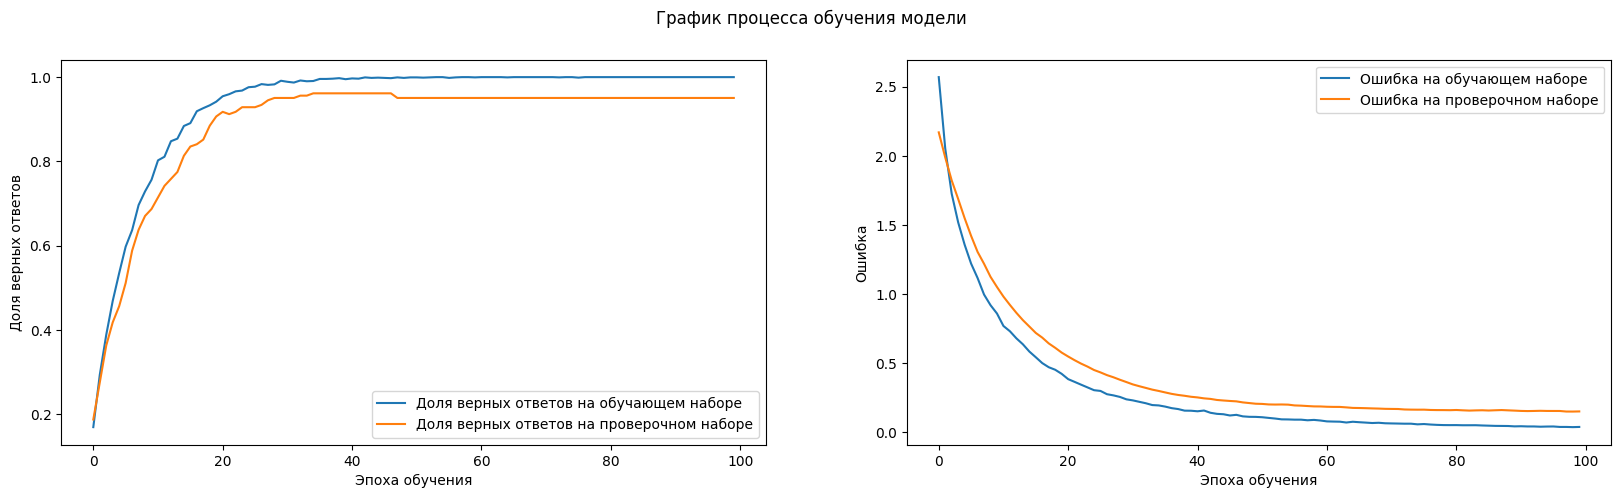

6/6 [==============================] - 0s 6ms/step


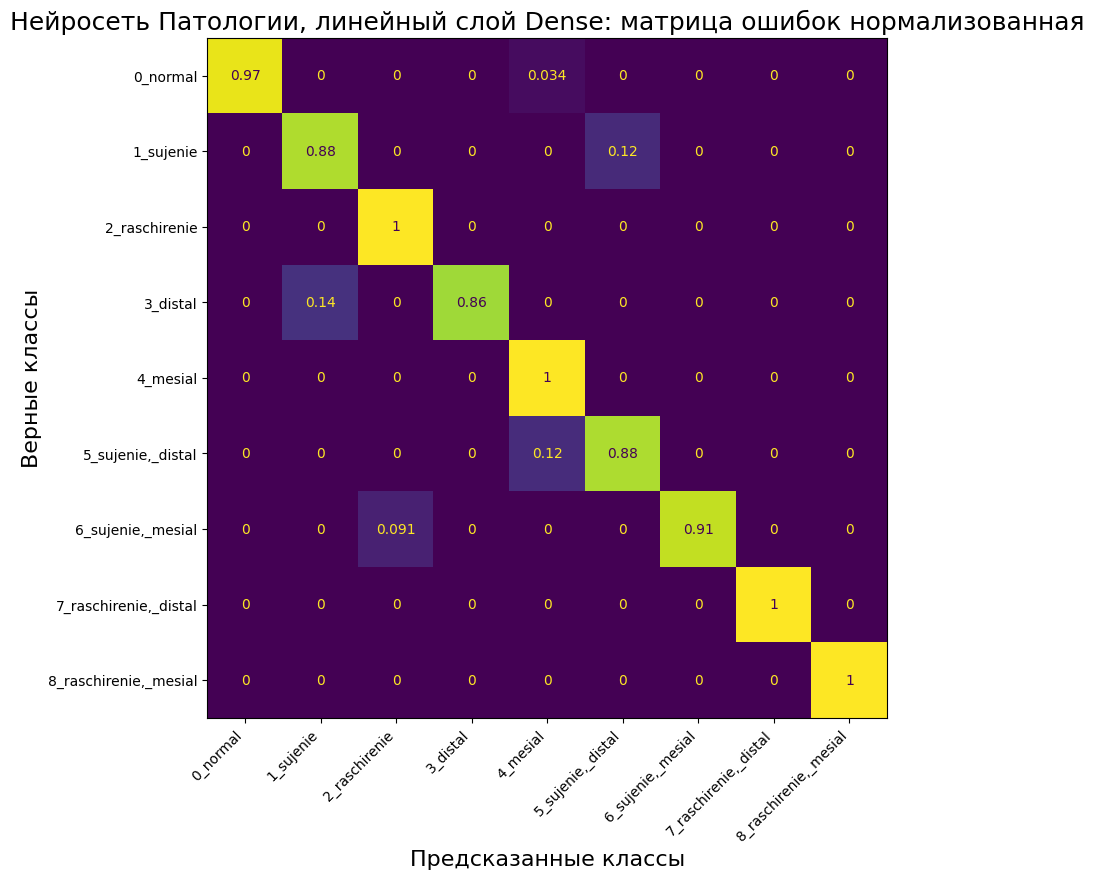

----------------------------------------------------------------------------------------------------
Нейросеть: Патологии, линейный слой Dense
Класс: 0_normal              97% сеть отнесла к классу 0_normal             - ВЕРНО :-)
Класс: 1_sujenie             88% сеть отнесла к классу 1_sujenie            - ВЕРНО :-)
Класс: 2_raschirenie        100% сеть отнесла к классу 2_raschirenie        - ВЕРНО :-)
Класс: 3_distal              86% сеть отнесла к классу 3_distal             - ВЕРНО :-)
Класс: 4_mesial             100% сеть отнесла к классу 4_mesial             - ВЕРНО :-)
Класс: 5_sujenie,_distal     88% сеть отнесла к классу 5_sujenie,_distal    - ВЕРНО :-)
Класс: 6_sujenie,_mesial     91% сеть отнесла к классу 6_sujenie,_mesial    - ВЕРНО :-)
Класс: 7_raschirenie,_distal 100% сеть отнесла к классу 7_raschirenie,_distal - ВЕРНО :-)
Класс: 8_raschirenie,_mesial 100% сеть отнесла к классу 8_raschirenie,_mesial - ВЕРНО :-)

Средняя точность распознавания:  94%


In [19]:

inputs_sag = Input(shape=(24576,), name='sag')
s1 = Dense(5000, activation='elu')(inputs_sag)
s2 = Dense(1000, activation='elu')(s1)
s3 = Dropout(0.01)(s2)

s4 = Dense(5000, activation='elu')(s3)
s5 = Dense(1000, activation='elu')(s4)
s6 = BatchNormalization()(s5)
s7 = Dropout(0.1)(s6)

s8 = Dense(5000, activation='elu')(s7)
s9 = Dense(500, activation='elu')(s8)
s10 = Dropout(0.1)(s9)

s11 = Dense(60, activation='selu')(s10)
s12 = Dense(60, activation='selu')(s11)
s13 = BatchNormalization()(s12)
s14 = Dropout(0.01)(s13)

outputs_sag = Dense(9, activation='softmax')(s14)
model_sagittal = Model(inputs=inputs_sag, outputs=outputs_sag, name='sagittal_model')

compile_train_eval_model(model_sagittal,
                        xTrain,yTraiN,
                         xVal, yVal,
                         optimizer= Adam(learning_rate=0.000001),
                         epochs=100,
                         batch_size=48,
                         class_labels=listic,
                         title='Патологии, линейный слой Dense')

In [ ]:
# Путь к папке для хранения моделей
save_path = '/content/drive/MyDrive/staj_2/model_sagittal_sq.h5'  # Укажите путь и имя файла для сохранения модели
# Сохранение модели
model_sagittal.save(save_path)

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
